- File: predict depth image
- Author: Haotian Li
- Desc: This file is to generate depth image and video using our model; 

In [40]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from matplotlib import pyplot as plt
import glob
from model import PTModel
import numpy as np
from PIL import Image
import matplotlib as mpl
import cv2
import os
from tqdm import tqdm
from torchinfo import summary

In [3]:
def load_images(image_files):
    loaded_images = []
    for file in image_files:
        x = np.clip(np.asarray(Image.open( file ), dtype=float) / 255, 0, 1)
        loaded_images.append(x)
    return np.stack(loaded_images, axis=0)

In [4]:
def my_DepthNorm(x, maxDepth):
    return maxDepth / x

def my_predict(model, images, minDepth=0, maxDepth=255):

  with torch.no_grad():
    # Compute predictions
    predictions = model(images)

    # Put in expected range
  return np.clip(my_DepthNorm(predictions.numpy(), maxDepth=maxDepth), minDepth, maxDepth) / maxDepth

***Load model***

In [ ]:
# another approach for torch's vision greater than 1.6 
model = PTModel()
model.load_state_dict(torch.load('nyu_pretrain.pth'))
torch.save(model.state_dict(), 'model.pth',_use_new_zipfile_serialization=False)

***Test configuration***

In [79]:
# resize file
filename = '../examples/377_image'
img = cv2.imread(filename + '.png')
res_img = cv2.resize(img, (int(img.shape[1]*2), int(img.shape[0]*2)))
cv2.imwrite(filename + '-res.png', res_img)

True

***Predicition and Display***

In [81]:
pretrain_model = torch.load('nyu_pretrain.pth',map_location=torch.device('cpu'))
# print(summary(pretrain_model))

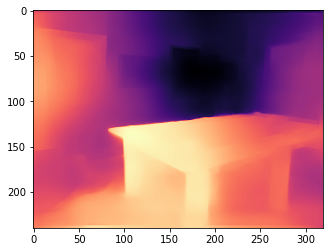

In [102]:
img = load_images(glob.glob('../examples/626_image'+'.png')).astype('float32')
pytorch_input = torch.from_numpy(img[0,:,:,:]).permute(2,0,1).unsqueeze(0)
output = my_predict(pretrain_model,pytorch_input[0,:,:,:].unsqueeze(0))
# print(output.shape)
plt.imshow(output[0,0,:,:],cmap='magma_r')
# plt.savefig('test.png')
plt.show()

***Save depth image as 'magma'***

In [103]:
# Saving colormapped depth image
outimg = output[0,0,:,:]
vmax = np.percentile(outimg, 95)
normalizer = mpl.colors.Normalize(vmin=outimg.min(), vmax=vmax)
mapper = plt.cm.ScalarMappable(norm=normalizer, cmap='magma')
colormapped_im = (mapper.to_rgba(outimg)[:, :, :3] * 255).astype(np.uint8)
im = Image.fromarray(colormapped_im)

im.save('626-pretrain.png')

- Our Model

In [105]:
model = torch.load('./epoch-raw/model-epoch19.pth',map_location=torch.device('cpu'))
# print(summary(model))

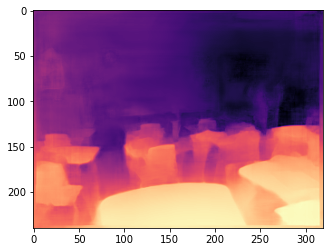

In [148]:
img = load_images(glob.glob('../examples/267_image'+'.png')).astype('float32')
pytorch_input = torch.from_numpy(img[0,:,:,:]).permute(2,0,1).unsqueeze(0)
output = my_predict(model,pytorch_input[0,:,:,:].unsqueeze(0))
# print(output.shape)
plt.imshow(output[0,0,:,:],cmap='magma_r')

plt.show()

In [133]:
# Saving colormapped depth image
outimg = output[0,0,:,:]
vmax = np.percentile(outimg, 95)
normalizer = mpl.colors.Normalize(vmin=outimg.min(), vmax=vmax)
mapper = plt.cm.ScalarMappable(norm=normalizer, cmap='gray')
colormapped_im = (mapper.to_rgba(outimg)[:, :, :3] * 255).astype(np.uint8)
im = Image.fromarray(colormapped_im)

im.save('626-low.png')

In [149]:
# Saving colormapped depth image -> gray scale
outimg = output[0,0,:,:]
vmax = np.percentile(outimg, 95)
normalizer = mpl.colors.Normalize(vmin=outimg.min(), vmax=vmax)
mapper = plt.cm.ScalarMappable(norm=normalizer, cmap='gray')
colormapped_im = (mapper.to_rgba(outimg)[:, :, :3] * 255).astype(np.uint8)
im = Image.fromarray(colormapped_im)

im.save('267-low.png')

- Resolution and Predicition

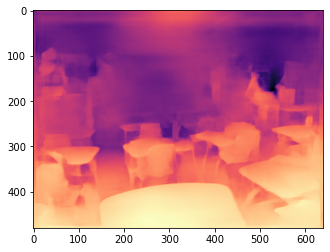

In [150]:
# resultion and predict
img = load_images(glob.glob('../examples/267_image'+'-res.png')).astype('float32')
pytorch_input = torch.from_numpy(img[0,:,:,:]).permute(2,0,1).unsqueeze(0)
output = my_predict(model,pytorch_input[0,:,:,:].unsqueeze(0))
# print(output.shape)
plt.imshow(output[0,0,:,:],cmap='magma_r')
# plt.savefig('test.png')
plt.show()

***Save depth image as 'magma'***

In [151]:
# Saving colormapped depth image
outimg = output[0,0,:,:]
vmax = np.percentile(outimg, 95)
normalizer = mpl.colors.Normalize(vmin=outimg.min(), vmax=vmax)
# mapper = plt.cm.ScalarMappable(norm=normalizer, cmap='magma')
mapper = plt.cm.ScalarMappable(norm=normalizer, cmap='gray')
colormapped_im = (mapper.to_rgba(outimg)[:, :, :3] * 255).astype(np.uint8)
im = Image.fromarray(colormapped_im)

im.save('267-high.png')